# Data Prep - Convert Data to be usable in Model and Select Non-Correlated Features: Threshold .7

In [1]:
import seaborn as sns
import pandas as pd

In [18]:
df = pd.read_csv('../Data/finalest_data.csv')
df.head()

,community_id,community_area_name,Per_Below_Poverty_Level,Per_Crowded_Housing,Per_Dependency,Per_No_High_School_Diploma,PerCapita_Income,2020_HH_SIZE,TOT_POP,MED_AGE,WHITE,HISP,BLACK,ASIAN,OTHER,MEDINC,Per_Unemployment,pop_dens_sqmi,stop_dens_sqmi
0,1.0,Rogers Park,22.7,7.9,28.8,18.1,23714.0,1.978714,55643.0,34.655351,24644.0,10537.0,15059.0,3018.0,2385.0,46244.10377,7.5,30232.61,54.891304
1,2.0,West Ridge,15.1,7.0,38.3,19.6,21375.0,2.850980,78763.0,35.617641,33123.0,15514.0,9166.0,16556.0,4404.0,57937.30032,7.9,21847.59,55.524079
2,3.0,Uptown,22.7,4.6,22.2,13.6,32355.0,1.709825,59453.0,36.502262,31611.0,8911.0,10752.0,6173.0,2006.0,57878.09524,7.7,24647.41,76.724138
3,4.0,Lincoln Square,9.5,3.1,25.6,12.5,35503.0,2.087917,41350.0,35.126636,26590.0,7373.0,1234.0,3771.0,2382.0,80899.83877,6.8,15817.97,53.125000
4,5.0,North Center,7.1,0.2,25.5,5.4,51615.0,2.348001,36142.0,34.310101,27005.0,4323.0,923.0,2156.0,1735.0,133537.46400,4.5,17128.78,56.097561


## Data Preparation

In [19]:
cols = ['WHITE', 'HISP', 'BLACK', 'ASIAN', 'OTHER', 'TOT_POP']
df[cols] = df[cols].divide(df['TOT_POP'], axis=0) * 100
df.rename(columns={'WHITE': 'per_white', 'HISP': 'per_hisp', 'BLACK': 'per_black',
                   'ASIAN': 'per_asian', 'OTHER': 'per_other'},inplace=True)
df.head()
#https://stackoverflow.com/questions/67922276/convert-pandas-dataframe-values-to-percentage

,community_id,community_area_name,Per_Below_Poverty_Level,Per_Crowded_Housing,Per_Dependency,Per_No_High_School_Diploma,PerCapita_Income,2020_HH_SIZE,TOT_POP,MED_AGE,per_white,per_hisp,per_black,per_asian,per_other,MEDINC,Per_Unemployment,pop_dens_sqmi,stop_dens_sqmi
0,1.0,Rogers Park,22.7,7.9,28.8,18.1,23714.0,1.978714,100.0,34.655351,44.289488,18.936793,27.063602,5.423863,4.286253,46244.10377,7.5,30232.61,54.891304
1,2.0,West Ridge,15.1,7.0,38.3,19.6,21375.0,2.850980,100.0,35.617641,42.054010,19.697066,11.637444,21.020022,5.591458,57937.30032,7.9,21847.59,55.524079
2,3.0,Uptown,22.7,4.6,22.2,13.6,32355.0,1.709825,100.0,36.502262,53.169731,14.988310,18.084874,10.382992,3.374094,57878.09524,7.7,24647.41,76.724138
3,4.0,Lincoln Square,9.5,3.1,25.6,12.5,35503.0,2.087917,100.0,35.126636,64.304716,17.830713,2.984281,9.119710,5.760580,80899.83877,6.8,15817.97,53.125000
4,5.0,North Center,7.1,0.2,25.5,5.4,51615.0,2.348001,100.0,34.310101,74.719163,11.961153,2.553816,5.965359,4.800509,133537.46400,4.5,17128.78,56.097561


In [20]:
df.to_csv('final_with_per.csv')

## Feature Selection

<AxesSubplot:>

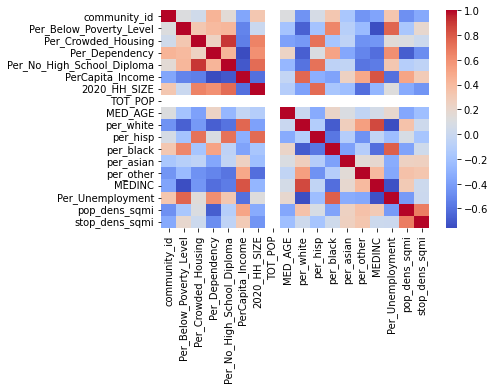

In [22]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

In [24]:
corr_matrix.style.format("{:.2f}")

,community_id,Per_Below_Poverty_Level,Per_Crowded_Housing,Per_Dependency,Per_No_High_School_Diploma,PerCapita_Income,2020_HH_SIZE,TOT_POP,MED_AGE,per_white,per_hisp,per_black,per_asian,per_other,MEDINC,Per_Unemployment,pop_dens_sqmi,stop_dens_sqmi
community_id,1.00,0.11,0.03,0.43,0.16,-0.37,0.33,nan,0.11,-0.46,0.07,0.33,-0.17,-0.45,-0.37,0.33,-0.47,-0.35
Per_Below_Poverty_Level,0.11,1.00,0.32,0.40,0.42,-0.53,0.00,nan,-0.20,-0.67,-0.20,0.64,-0.10,-0.25,-0.75,0.76,-0.17,0.19
Per_Crowded_Housing,0.03,0.32,1.00,0.24,0.91,-0.55,0.65,nan,-0.39,-0.43,0.71,-0.18,-0.06,-0.46,-0.44,0.14,0.11,0.02
Per_Dependency,0.43,0.40,0.24,1.00,0.42,-0.76,0.60,nan,0.24,-0.68,0.10,0.52,-0.36,-0.52,-0.62,0.60,-0.69,-0.48
Per_No_High_School_Diploma,0.16,0.42,0.91,0.42,1.00,-0.71,0.73,nan,-0.27,-0.59,0.71,-0.07,-0.05,-0.59,-0.56,0.32,-0.11,-0.06
PerCapita_Income,-0.37,-0.53,-0.55,-0.76,-0.71,1.00,-0.61,nan,-0.04,0.76,-0.32,-0.38,0.25,0.49,0.82,-0.61,0.51,0.30
2020_HH_SIZE,0.33,0.00,0.65,0.60,0.73,-0.61,1.00,nan,-0.12,-0.39,0.74,-0.18,-0.23,-0.61,-0.28,0.12,-0.34,-0.45
TOT_POP,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
MED_AGE,0.11,-0.20,-0.39,0.24,-0.27,-0.04,-0.12,nan,1.00,-0.00,-0.34,0.22,0.10,-0.05,0.05,0.19,-0.36,-0.23
per_white,-0.46,-0.67,-0.43,-0.68,-0.59,0.76,-0.39,nan,-0.00,1.00,-0.12,-0.69,0.27,0.54,0.85,-0.75,0.35,0.02


- per below povery and per unemployed = .76 - take %unemployed because already have income data
- per crowded housing and No high school diploma .91 - take No_high school diploma for education
- tot pop and population density - take population density?
- med income and per capita income .81 - take med to better reflect average person in communioty?

In [25]:
df_after_cor = df.drop(['Per_Below_Poverty_Level', 'Per_Crowded_Housing', 'TOT_POP',
                         'PerCapita_Income'], axis=1)

In [26]:
df_after_cor.drop(['community_area_name'], axis=1, inplace=True)

In [27]:
df_after_cor.set_index(['community_id'], inplace=True)

In [17]:
df_after_cor.head()
df_after_cor.to_csv('data_after_corr.csv')

,Per_Dependency,Per_No_High_School_Diploma,2020_HH_SIZE,MED_AGE,per_white,per_hisp,per_black,per_asian,per_other,MEDINC,Per_Unemployment,pop_dens_sqmi
community_id,,,,,,,,,,,,
1.0,28.8,18.1,1.978714,34.655351,44.289488,18.936793,27.063602,5.423863,4.286253,46244.10377,7.5,30232.61
2.0,38.3,19.6,2.850980,35.617641,42.054010,19.697066,11.637444,21.020022,5.591458,57937.30032,7.9,21847.59
3.0,22.2,13.6,1.709825,36.502262,53.169731,14.988310,18.084874,10.382992,3.374094,57878.09524,7.7,24647.41
4.0,25.6,12.5,2.087917,35.126636,64.304716,17.830713,2.984281,9.119710,5.760580,80899.83877,6.8,15817.97
5.0,25.5,5.4,2.348001,34.310101,74.719163,11.961153,2.553816,5.965359,4.800509,133537.46400,4.5,17128.78


## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
target = df_after_cor.pop('stop_dens_sqmi')

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_after_cor)

In [13]:
scaled_df = pd.DataFrame(scaled_features, columns=df_after_cor.columns)
scaled_df['stop_dens_sqmi'] = target

In [14]:
scaled_df.head()

,Per_Dependency,Per_No_High_School_Diploma,2020_HH_SIZE,MED_AGE,per_white,per_hisp,per_black,per_asian,per_other,MEDINC,Per_Unemployment,pop_dens_sqmi,stop_dens_sqmi
0,-0.973337,-0.284826,-1.128451,-0.415708,0.625400,-0.273202,-0.257450,-0.095778,1.301235,-0.472793,-0.836434,2.301314,NaN
1,0.342008,-0.162622,0.665484,-0.209633,0.540069,-0.245387,-0.659805,1.355876,2.157760,-0.052162,-0.778808,1.165326,54.891304
2,-1.887156,-0.651440,-1.681458,-0.020191,0.964372,-0.417658,-0.491639,0.365806,0.702641,-0.054291,-0.807621,1.544641,55.524079
3,-1.416401,-0.741057,-0.903859,-0.314782,1.389411,-0.313668,-0.885502,0.248223,2.268745,0.773854,-0.937281,0.348444,76.724138
4,-1.430246,-1.319491,-0.368961,-0.489644,1.786946,-0.528408,-0.896730,-0.045377,1.638710,2.667351,-1.268633,0.526030,53.125000


In [15]:
scaled_df.to_csv('scaled_data.csv')